# 🛠️ Yeo-Johnson Transformation: The All-Purpose Normalizer

The Yeo-Johnson transformation is a power transformation that can be applied to **any** real-valued data—positive, zero, or negative. It is the default choice in most modern Machine Learning pipelines when the data's distribution shape is unknown.

---

### 1. Why Yeo-Johnson? (The Evolution)
In real-world datasets, features like "Profit/Loss," "Temperature," or "Price Change" often contain zeros or negative values. 
* **Box-Cox:** Fails on these datasets.
* **Yeo-Johnson:** Uses a piecewise function to apply different power transformations depending on whether the data point is positive or negative, ensuring the result is smooth and continuous.



---

### 2. The Mathematical Formula
Yeo-Johnson uses different logic for different data regions to ensure the transformation is mathematically valid:



$$y(\lambda, x) = \begin{cases} 
((x + 1)^\lambda - 1) / \lambda & \text{if } \lambda \neq 0, x \ge 0 \\ 
\ln(x + 1) & \text{if } \lambda = 0, x \ge 0 \\ 
-((-x + 1)^{2-\lambda} - 1) / (2 - \lambda) & \text{if } \lambda \neq 2, x < 0 \\ 
-\ln(-x + 1) & \text{if } \lambda = 2, x < 0 
\end{cases}$$

**Key Takeaway:** You don't need to memorize this! The algorithm automatically finds the value of $\lambda$ that minimizes the variance and maximizes the normality of your specific dataset.

---

### 3. Box-Cox vs. Yeo-Johnson: A Final Showdown

| Feature | Box-Cox | Yeo-Johnson |
| :--- | :--- | :--- |
| **Handles $x > 0$** | ✅ Yes | ✅ Yes |
| **Handles $x = 0$** | ❌ No | ✅ Yes |
| **Handles $x < 0$** | ❌ No | ✅ Yes |
| **Complexity** | Simple Power Law | Piecewise Power Law |
| **When to use?** | Classic statistics / Positive data | **Modern ML Pipelines / General Data** |

---

### 4. 🐍 Python Implementation (The Professional Way)

While `scipy` has a standalone function, data scientists usually use Scikit-Learn's `PowerTransformer` because it integrates perfectly into `Pipelines` and handles the "fitting" process for you.


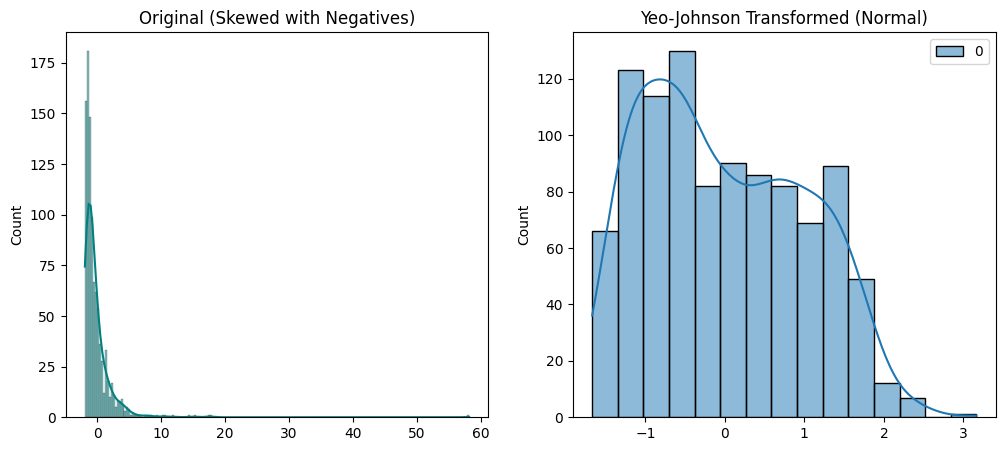

Optimal Lambda: -0.0270


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# 1. Create a dataset with positive, zero, and negative values
# This would break Box-Cox!
data = np.random.normal(loc=0, scale=1, size=1000) 
data = np.exp(data) - 2 # Shift to create skewness and negatives

# 2. Apply Yeo-Johnson via PowerTransformer
# 'method' can be 'yeo-johnson' or 'box-cox'
yj_scaler = PowerTransformer(method='yeo-johnson')
data_transformed = yj_scaler.fit_transform(data.reshape(-1, 1))

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=ax1, color='teal')
ax1.set_title("Original (Skewed with Negatives)")

sns.histplot(data_transformed, kde=True, ax=ax2, color='darkblue')
ax2.set_title("Yeo-Johnson Transformed (Normal)")

plt.show()

print(f"Optimal Lambda: {yj_scaler.lambdas_[0]:.4f}")